<a href="https://colab.research.google.com/github/BIRAN/SAS_Visual_Forecasting/blob/master/deep_learning/tcn_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tcn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import Input, Model
from keras.layers import Dense

from tcn import TCN

url = 'https://raw.githubusercontent.com/BIRAN/keras-tcn/master/tasks/monthly-milk-production-pounds-p.csv'
milk = pd.read_csv(url, index_col=0, parse_dates=True)

Using TensorFlow backend.


In [3]:
print(milk.head())

            milk_production_pounds
month                             
1962-01-01                     589
1962-02-01                     561
1962-03-01                     640
1962-04-01                     656
1962-05-01                     727


In [4]:
##
# It's a very naive (toy) example to show how to do time series forecasting.
# - There are no training-testing sets here. Everything is training set for simplicity.
# - There is no input/output normalization.
# - The model is simple.
##
lookback_window = 12  # months.

milk = milk.values  # just keep np array here for simplicity.

x, y = [], []
for i in range(lookback_window, len(milk)):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])
    
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(156, 12, 1)
(156, 1)


In [0]:
# add callbacks 

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<20):
      print("\nReached high accuracy so cancelling training!")
      self.model.stop_training = True


callbacks = myCallback()

In [6]:
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])

model.summary()

W0815 15:11:40.732051 139838907565952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 15:11:40.750784 139838907565952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 15:11:40.755143 139838907565952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0815 15:11:40.816406 139838907565952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 15:11:41.356209 139838907565952 de

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 12, 1)        0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 12, 64)       128         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 12, 64)       8256        conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 12, 64)       0           conv1d_2[0][0]                   
__________________________________________________________________________________________________
spatial_dr

W0815 15:11:41.990592 139838907565952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/300
 - 1s - loss: 4208.8006
Epoch 2/300
 - 0s - loss: 1443.9459
Epoch 3/300
 - 0s - loss: 1299.5113
Epoch 4/300
 - 0s - loss: 1580.6245
Epoch 5/300
 - 0s - loss: 1188.9159
Epoch 6/300
 - 0s - loss: 773.1348
Epoch 7/300
 - 0s - loss: 386.4376
Epoch 8/300
 - 0s - loss: 721.2585
Epoch 9/300
 - 0s - loss: 545.4288
Epoch 10/300
 - 0s - loss: 431.0598
Epoch 11/300
 - 0s - loss: 451.3704
Epoch 12/300
 - 0s - loss: 465.7436
Epoch 13/300
 - 0s - loss: 270.4517
Epoch 14/300
 - 0s - loss: 193.1518
Epoch 15/300
 - 0s - loss: 107.7688
Epoch 16/300
 - 0s - loss: 180.6778
Epoch 17/300
 - 0s - loss: 171.4618
Epoch 18/300
 - 0s - loss: 120.0292
Epoch 19/300
 - 0s - loss: 175.9497
Epoch 20/300
 - 0s - loss: 109.0000
Epoch 21/300
 - 0s - loss: 84.8660
Epoch 22/300
 - 0s - loss: 251.6077
Epoch 23/300
 - 0s - loss: 505.1559
Epoch 24/300
 - 0s - loss: 672.5785
Epoch 25/300
 - 0s - loss: 350.6734
Epoch 26/300
 - 0s - loss: 122.2265
Epoch 27/300
 - 0s - loss: 259.1877
Epoch 28/300
 - 0s - loss: 126.08

In [0]:
model.compile('adam', 'mae')
print('Train...')
history = model.fit(x, y, epochs=300, verbose=2, callbacks=[callbacks])

<Figure size 432x288 with 0 Axes>

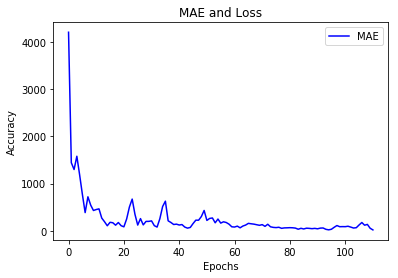

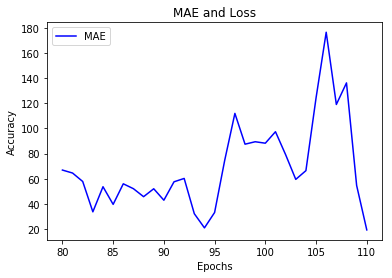

<Figure size 432x288 with 0 Axes>

In [16]:
loss=history.history['loss']
epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot Loss
#------------------------------------------------

plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[80:]

loss_zoom = loss[80:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------

plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()


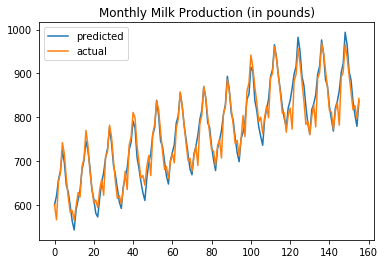

In [17]:
p = model.predict(x)

plt.plot(p)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.show()

In [0]:
# plot the model

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model-TCN.png', show_shapes=True)
